In [ ]:
# Instalando e atualizando as bibliotecas necessárias
!pip install pyDOE
!pip install -U seaborn

In [7]:
# Importando RASD Toolbox
from RASD_TOOLBOX import *
# Importando Numpy toolbox
import numpy as n

In [100]:
w = ['NORMAL', 0.25, 0.025]
P = ['NORMAL', 10.2, 1.12]
Fy = ['NORMAL', 40.3, 4.64]
#POP = ['10000']

POP = np.arange(10,1000000, 10000).tolist()

SETUP = {'N_REP': len(POP),
        'POP': POP,
        'N_G': 1,
        'D': 3,
        'VARS': [w, P, Fy],
        'MODEL': 'MCS'}

In [101]:
def OBJ(X):
    w = X[0]
    P = X[1]
    Fy = X[2]
    

    # STATE LIMIT FUNCTION
    
    R_0 = 80 * Fy
    S_0 = 54 * P + 5832 * w
    G_0 = S_0 - R_0

    R = [R_0] 
    S = [S_0] 
    G = [G_0]


    return R, S, G

In [102]:
RESULTS_TEST = RASD_STOCHASTIC(SETUP, OBJ)

In [121]:
RESULTS_TEST[7]['TOTAL RESULTS']

,X_0,X_1,X_2,R_0,S_0,G_0,I_0
0,0.245552,10.847106,50.296001,4023.680090,2017.805537,-2005.874553,0.0
1,0.296815,11.694719,31.993870,2559.509585,2362.541691,-196.967894,0.0
2,0.210122,8.777530,32.555005,2604.400433,1699.419260,-904.981173,0.0
3,0.288329,9.352142,41.171428,3293.714242,2186.547921,-1107.166321,0.0
4,0.283892,10.464814,38.394931,3071.594447,2220.757973,-850.836475,0.0
...,...,...,...,...,...,...,...
70005,0.218371,12.654502,32.813985,2625.118839,1956.880560,-668.238279,0.0
70006,0.268025,10.476317,37.198074,2975.845889,2128.843872,-847.002017,0.0
70007,0.238452,10.007966,38.069446,3045.555685,1931.080097,-1114.475588,0.0
70008,0.226998,11.531622,35.424574,2833.965947,1946.560557,-887.405390,0.0


In [129]:
max(POP)

990010

In [109]:
DADOS = RESULTS_TEST[99]['TOTAL RESULTS']

C:\Users\Donizetti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


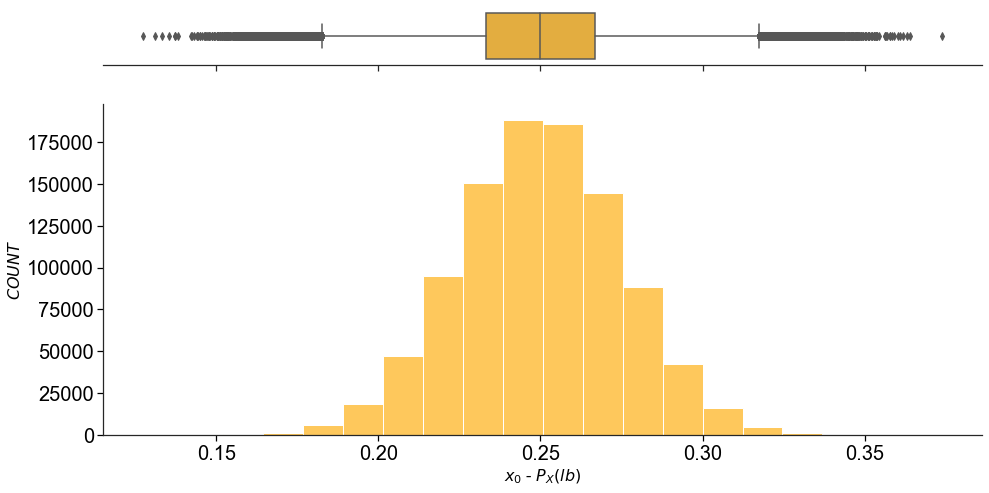

In [110]:
OPCOES_GRAFICAS = {'NAME': 'WANDER',
                'WIDTH': 0.40, 
                'HEIGHT': 0.20, 
                'X AXIS SIZE': 20,
                'Y AXIS SIZE': 20,
                'AXISES COLOR': '#000000',
                'X AXIS LABEL': '$x_0$ - $P_X (lb)$',
                'LABELS SIZE': 16,
                'LABELS COLOR': '#000000',  
                'CHART COLOR': '#FEB625',
                'KDE': False,
                'DPI': 600, 
                'BINS' : 20,
                'EXTENSION': '.svg'}
# RESULTS X_0 VARIABLE
OPCOES_DADOS = {'DATASET': DADOS, 'COLUMN': 'X_0'}      
# CALL PLOT
RASD_PLOT_1(OPCOES_DADOS, OPCOES_GRAFICAS)

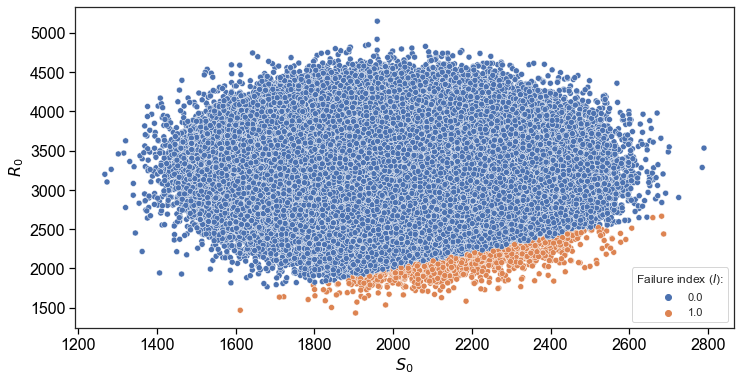

In [111]:
OPCOES_GRAFICAS = {'NAME': 'WANDER',
                'EXTENSION': '.svg',
                'DPI': 600,
                'WIDTH': 0.300, 
                'HEIGHT': 0.150,              
                'X DATA': 'S_0',
                'Y DATA': 'R_0',
                'X AXIS SIZE': 16,
                'Y AXIS SIZE': 16,
                'AXISES COLOR': '#000000',
                'X AXIS LABEL': '$S_0$',
                'Y AXIS LABEL': '$R_0$',
                'LABELS SIZE': 16,
                'LABELS COLOR': '#000000',
                'LOC LEGEND': 'lower right',
                'TITLE LEGEND': 'Failure index ($I$):'}
# RESULTS
OPCOES_DADOS = {'DATASET': DADOS, 'X DATA': 'S_0', 'Y DATA': 'R_0', 'HUE VALUE': 'I_0'}    
# CALL PLOT
RASD_PLOT_2(OPCOES_DADOS, OPCOES_GRAFICAS)

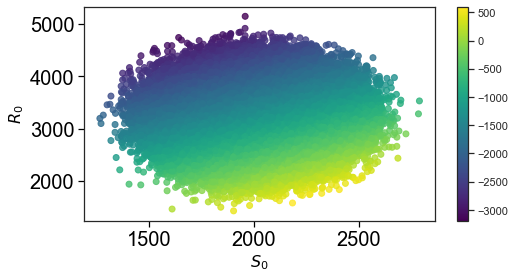

In [112]:
OPCOES_GRAFICAS = {'NAME': 'WANDER',
                'EXTENSION': '.svg',
                'DPI': 600,
                'WIDTH': 0.20, 
                'HEIGHT': 0.10,              
                'X DATA': 'S_0',
                'Y DATA': 'R_0',
                'X AXIS SIZE': 20,
                'Y AXIS SIZE': 20,
                'AXISES COLOR': '#000000',
                'X AXIS LABEL': '$S_0$',
                'Y AXIS LABEL': '$R_0$',
                'LABELS SIZE': 16,
                'LABELS COLOR': '#000000',
                'G VALUE': 'G_0',
                'TRANSPARENCY': 0.8,
                'COLOR MAP': 'viridis'}


# RESULTS
OPCOES_DADOS = {'DATASET': DADOS, 'X DATA': 'S_0', 'Y DATA': 'R_0', 'G VALUE': 'G_0'}       

# CALL PLOT
RASD_PLOT_3(OPCOES_DADOS, OPCOES_GRAFICAS)

In [ ]:
plt.hist(RESULTS_TEST[0]['TOTAL RESULTS']['R_0'], bins=50, label='a', alpha=0.5)
plt.hist(RESULTS_TEST[0]['TOTAL RESULTS']['S_0'], bins=50, label='b', alpha=0.5)

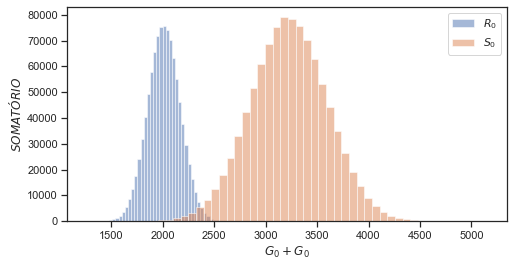

In [113]:
OPCOES_GRAFICAS = {'NAME': 'WANDER',
                    'EXTENSION': '.svg',
                    'DPI': 600,
                    'WIDTH': 0.20,
                    'HEIGHT': 0.10,
                    'X DATA': 'S_0',
                    'Y DATA': 'R_0',
                    'X AXIS SIZE': 20,
                    'Y AXIS SIZE': 20,
                    'AXISES COLOR': '#000000',
                    'X AXIS LABEL': '$G_0 + G_0$',
                    'Y AXIS LABEL': '$SOMATÓRIO$',
                    'LABELS SIZE': 16,
                    'LABELS COLOR': '#000000',
                    'C VALUE': 'G_0',
                    'TRANSPARENCY': 0.8,
                    'COLOR MAP': 'viridis',
                    'BINS': '50',
                    'ALPHA': '0.5'}

# RESULTS
OPCOES_DADOS = {'DATASET': DADOS, 'X DATA': 'S_0', 'Y DATA': 'R_0', 'G VALUE': 'G_0'}       

# CALL PLOT
RASD_PLOT_4(OPCOES_DADOS, OPCOES_GRAFICAS)

In [42]:
RESULTS_TEST[0]['TOTAL RESULTS']

,X_0,X_1,X_2,R_0,S_0,G_0,I_0
0,0.272521,9.582935,40.703030,3256.242397,2106.820662,-1149.421735,0.0
1,0.292102,9.432674,41.889707,3351.176550,2212.905513,-1138.271037,0.0
2,0.253504,8.367000,44.034110,3522.728774,1930.253961,-1592.474814,0.0
3,0.258557,9.576463,36.132423,2890.593875,2025.033734,-865.560141,0.0
4,0.261010,10.110008,46.039597,3683.167742,2068.150656,-1615.017086,0.0
...,...,...,...,...,...,...,...
9995,0.290459,9.327773,35.569446,2845.555700,2197.655952,-647.899748,0.0
9996,0.244658,9.227486,47.298766,3783.901303,1925.128324,-1858.772980,0.0
9997,0.222989,10.722761,43.601636,3488.130843,1879.503671,-1608.627171,0.0
9998,0.261058,10.413127,39.004027,3120.322175,2084.797058,-1035.525117,0.0


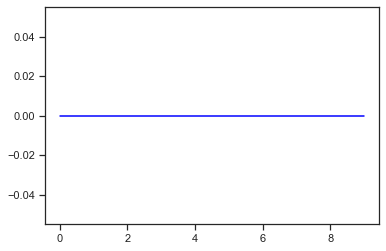

In [114]:
plt.plot( pd.Series(range(0,len(RESULTS_TEST[0]['TOTAL RESULTS']))), RESULTS_TEST[0]['TOTAL RESULTS']['I_0'], color='blue')

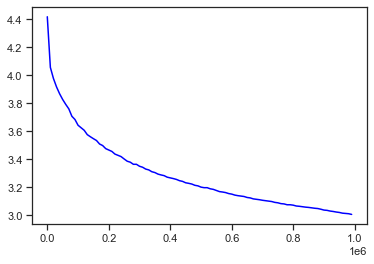

In [115]:
#MESMO DATAFRAME
Bf = [ ]
Af = [ ]
c = 100
BETA_DF = pd.read_csv('RASD_TOOLBOX/beta_df.txt', delimiter = ";",  names = ['PF' ,'BETA'])

for i in POP:
   Af.append((RESULTS_TEST[len(POP)-1]['TOTAL RESULTS']['I_0'].head(i).sum())/max(POP)) # soma valores anteriores de I_0 e calcula PF

df = pd.DataFrame(Af,columns=['Pf']) #converte para DF

for i in range(len(POP)): #Salva os valores em um DF a cada 100 valores
    Bf.append((BETA_DF['PF'].sub(Af[i]).abs().idxmin())/1000)
  
plt.plot(POP, Bf, color='blue')

#plt.plot( pd.Series(range(0,len(RESULTS_TEST[0]['TOTAL RESULTS']),c)), Bf, color='blue')

#plt.plot( pd.Series(range(0,len(RESULTS_TEST[0]['TOTAL RESULTS']))), RESULTS_TEST[0]['TOTAL RESULTS']['I_0'], color='blue')

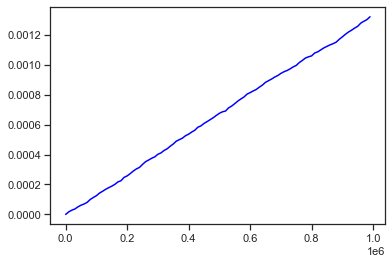

In [116]:
plt.plot(POP, Af, color='blue')

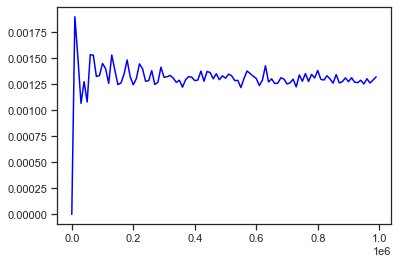

In [117]:
PF_AUX = []
BETA_AUX = []

for i in range (len(POP)):
    PF_AUX.append(RESULTS_TEST[i]['PROBABILITY OF FAILURE'][0])
    BETA_AUX.append(RESULTS_TEST[i]['BETA INDEX'][0])

plt.plot(POP, PF_AUX, color='blue')

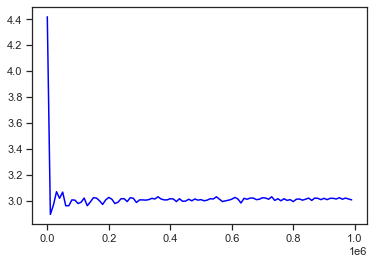

In [118]:
plt.plot(POP, BETA_AUX, color='blue')